In [355]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline



In [ ]:
df = pd.read_csv('loan_data_2007_2014.csv')
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
rows, columns = df.shape
print("Jumlah baris:", rows)
print("Jumlah kolom:", columns)

Jumlah baris: 466285
Jumlah kolom: 75


In [ ]:
df_1 = df.isna()
df_1.sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,466285
total_rev_hi_lim,70276
inq_fi,466285
total_cu_tl,466285


In [ ]:
df_2 = df.duplicated()
df_2.sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Total null values
missing_null = df_cleaned.isnull().sum()
percentage_miss = df_cleaned.isnull().sum() * 100/ len(df)
dtypes = [df_cleaned[col].dtype for col in df_cleaned.columns]
df_miss_val = pd.DataFrame({'Total Null': missing_null, 'data_type': dtypes, 'Percentage Missing': percentage_miss})
df_miss_val.sort_values('Percentage Missing', ascending = False,inplace = True)
missing_value = df_miss_val[df_miss_val['Percentage Missing']>0].reset_index()
missing_value

,index,Total Null,data_type,Percentage Missing
0,inq_last_12m,466285,float64,100.000000
1,total_bal_il,466285,float64,100.000000
2,dti_joint,466285,float64,100.000000
3,verification_status_joint,466285,float64,100.000000
4,annual_inc_joint,466285,float64,100.000000
5,open_acc_6m,466285,float64,100.000000
6,open_il_6m,466285,float64,100.000000
7,open_il_12m,466285,float64,100.000000
8,open_il_24m,466285,float64,100.000000
9,mths_since_rcnt_il,466285,float64,100.000000


In [ ]:
# Get columns with more than 50% missing values
col_full_null = df_miss_val.loc[df_miss_val['Percentage Missing'] > 50].index.tolist()

# Drop those columns, ignoring errors if some are not present
df_cleaned.drop(columns=col_full_null, inplace=True, errors='ignore')

# Define columns to drop manually
columns_to_drop = [
    'policy_code', 'application_type', 'title', 'url', 'zip_code',
    'addr_state', 'sub_grade', 'Unnamed: 0', 'id', 'member_id',
    'emp_title', 'pymnt_plan', 'issue_d'
]

# Drop those columns as well, ignoring errors if some are not present
df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [ ]:
# Replace missing values in specific columns with 0
cols_to_fill_zero = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df_cleaned[cols_to_fill_zero] = df_cleaned[cols_to_fill_zero].fillna(0)

# Replace missing values in numerical columns with the column median
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df_cleaned[col].isnull().any():
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)

# Replace missing values in categorical columns with the column mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        mode_value = df_cleaned[col].mode(dropna=True)[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)

# Display the count of missing values in the dataframe
missing_values_summary = df_cleaned.isnull().sum()
print(missing_values_summary)


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [ ]:
# Count occurrences of each unique value in the 'loan_status' column
loan_status_counts = df_cleaned['loan_status'].value_counts(dropna=False)

# Display the counts with additional formatting
print("Loan Status Counts:\n")
print(loan_status_counts)


Loan Status Counts:

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [ ]:
# Define the list of good loan statuses
good_statuses = ['Current', 'Fully Paid', 'In Grace Period']

# Map the loan statuses to binary values (1 for good, 0 for others)
df_cleaned['loan_status'] = df_cleaned['loan_status'].map(lambda x: 1 if x in good_statuses else 0)

# Calculate the percentage of each binary value
loan_status_percentage = (df_cleaned['loan_status'].value_counts() / len(df_cleaned)) * 100

# Display the result
print(loan_status_percentage)


loan_status
1    88.381784
0    11.618216
Name: count, dtype: float64


In [ ]:
print(df_cleaned.columns)


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [ ]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format = '%b-%y')
df_cleaned['last_credit_pull_d'] = pd.to_datetime(df_cleaned['last_credit_pull_d'], format = '%b-%y')
df_cleaned['last_pymnt_d'] = pd.to_datetime(df_cleaned['last_pymnt_d'], format = '%b-%y')


In [ ]:
# Define the reference date
reference_date = pd.to_datetime('2016-03-01')

# Convert date columns to the number of months since the reference date
date_columns = ['earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d']
for col in date_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = round((reference_date - pd.to_datetime(df_cleaned[col], errors='coerce')).dt.days / 30.44)


In [ ]:
# Convert the 'term' column to string first, then extract the numeric part
df_cleaned['term'] = df_cleaned['term'].astype(str).str.extract(r'(\d+)').astype(int)

Exploratory Data Analysis

In [ ]:
# Identify numeric and categorical columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns

In [ ]:
# Generate descriptive statistics for numeric columns and transpose the result
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466256.0,11.187069,4.987526,0.00,8.000000,10.000000,14.00000,8.400000e+01


In [ ]:
df[categorical_columns].describe().T

,count,unique,top,freq
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005


In [ ]:
numeric_data = df_cleaned[numeric_columns]

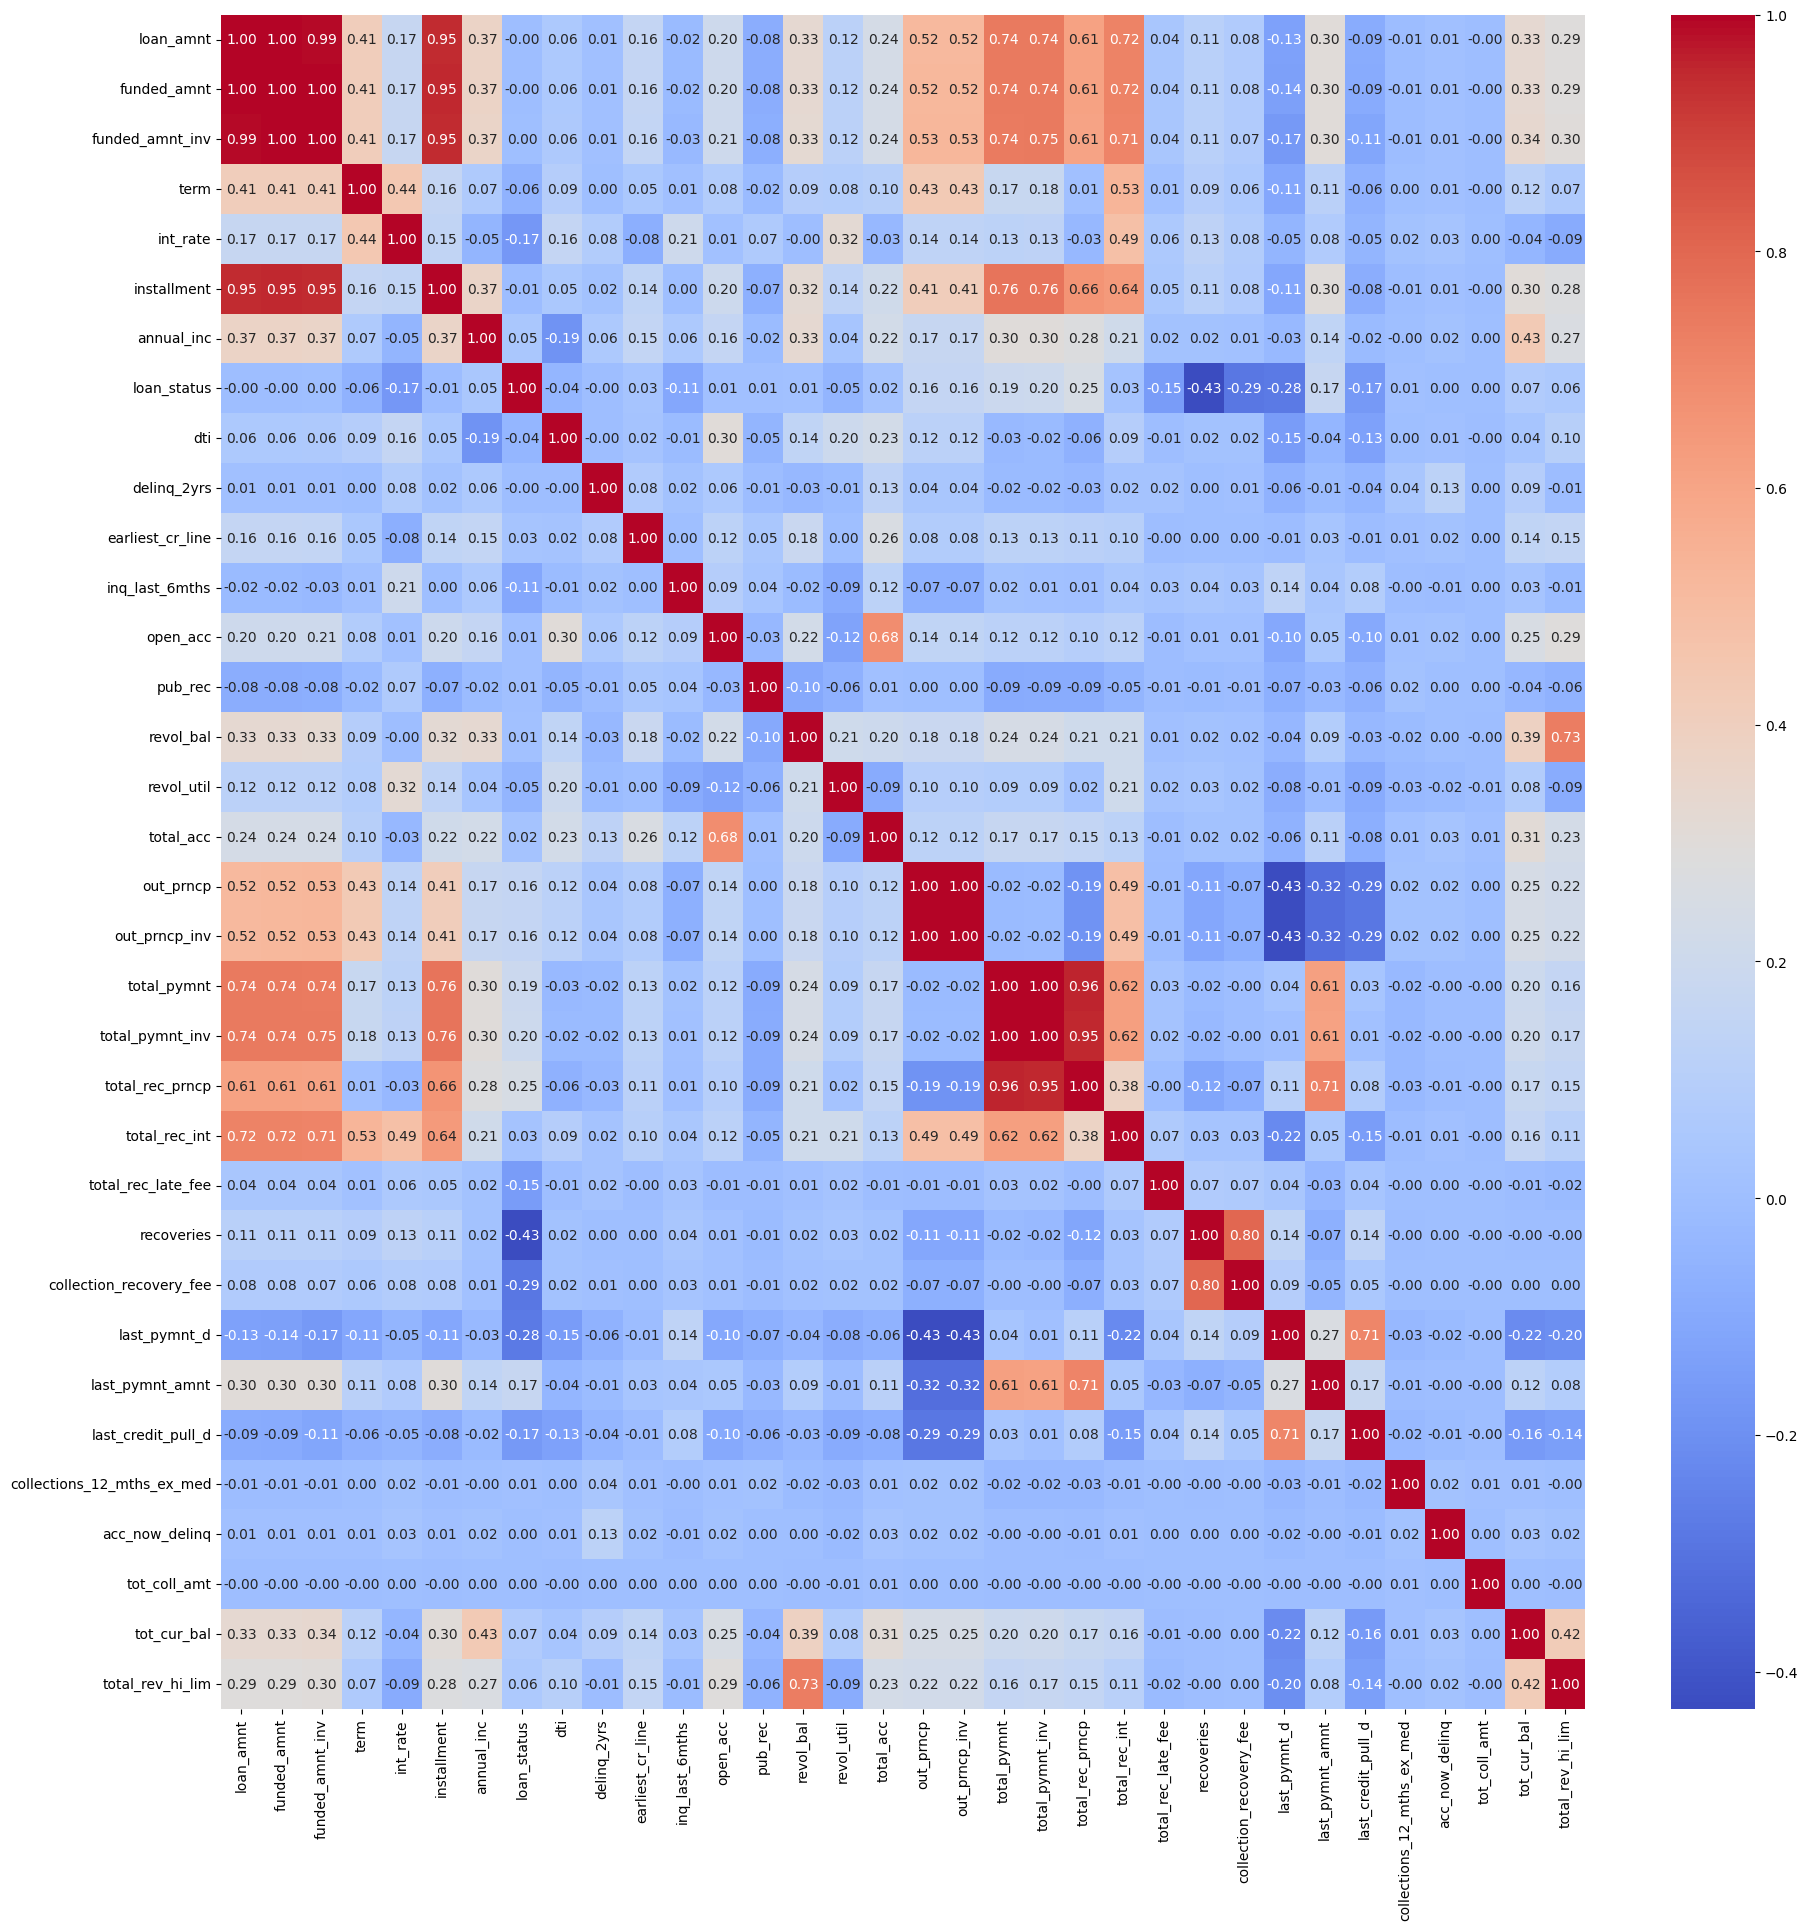

In [ ]:

# Drop columns with constant values or near-zero variability
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Replace NaN values in the correlation matrix with 0
correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()


In [ ]:
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Compute the absolute correlation matrix
cor_matrix = numeric_df.corr().abs()

# Mask the upper triangle of the correlation matrix
high = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Identify columns with high correlation (above 0.7)
hicorr_drop_list = [column for column in high.columns if any(high[column] > 0.7)]

# Display the list of columns to drop
print(hicorr_drop_list)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d', 'total_rev_hi_lim']


In [ ]:
df_cleaned.drop(hicorr_drop_list, axis = 1, inplace=True)

In [ ]:
# Pastikan semua kolom numerik
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Periksa apakah 'loan_status' ada dan bertipe numerik
if 'loan_status' not in numeric_cols:
    print(f"'loan_status' tidak numerik. Mengonversi...")
    df_cleaned['loan_status'] = pd.to_numeric(df_cleaned['loan_status'], errors='coerce')

# Hitung korelasi hanya pada kolom numerik
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_with_target = numeric_df.corr()['loan_status'].sort_values()

# Tampilkan hasil korelasi
print(correlation_with_target)

recoveries                   -0.426263
last_pymnt_d                 -0.275550
int_rate                     -0.172282
total_rec_late_fee           -0.154241
inq_last_6mths               -0.110241
term                         -0.058383
revol_util                   -0.047981
dti                          -0.043026
loan_amnt                    -0.004195
delinq_2yrs                  -0.002164
acc_now_delinq                0.000468
tot_coll_amt                  0.001489
collections_12_mths_ex_med    0.005177
open_acc                      0.008081
pub_rec                       0.009916
revol_bal                     0.011045
total_acc                     0.024612
earliest_cr_line              0.032705
annual_inc                    0.048963
tot_cur_bal                   0.071906
out_prncp                     0.157245
loan_status                   1.000000
next_pymnt_d                       NaN
Name: loan_status, dtype: float64


In [ ]:
data_for_eda = df.copy(deep=True)

In [ ]:
# Define a list of conditions for 'Bad Risk'
bad_risk_conditions = [
    'Charged Off',
    'Default',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
]

# Assign 'Bad Risk' or 'Good Risk' based on conditions
data_for_eda['risk'] = np.where(data_for_eda['loan_status'].isin(bad_risk_conditions), 'Bad Risk', 'Good Risk')


In [ ]:
# Ensure 'Total Applicants' column is numeric
loan_by_status['Total Applicants'] = pd.to_numeric(loan_by_status['Total Applicants'], errors='coerce')

# Calculate the percentage
loan_by_status['%'] = (loan_by_status['Total Applicants'] * 100 / loan_by_status['Total Applicants'].sum()).round(2)


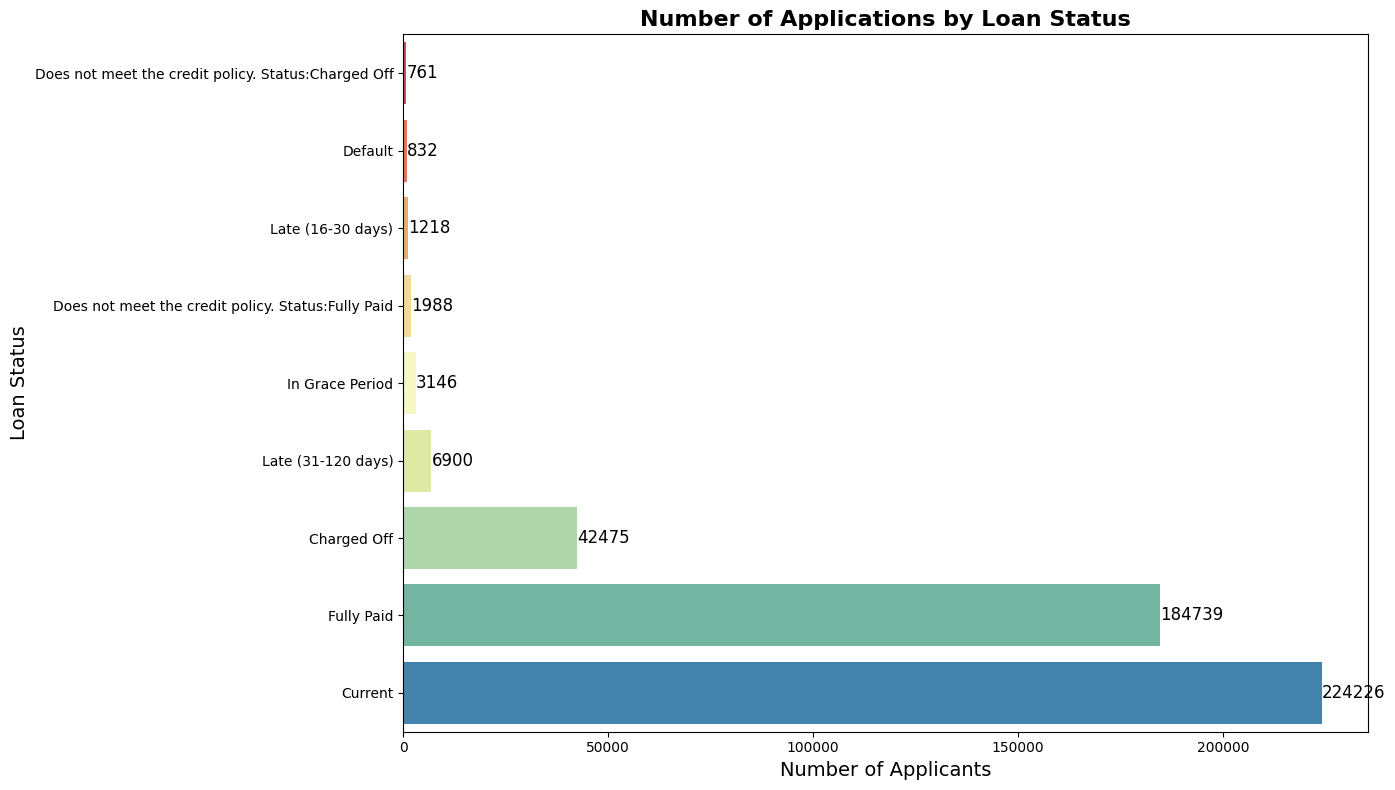

In [ ]:
# Count the number of applicants by loan status, sorted in ascending order
loan_status_counts = data_for_eda['loan_status'].value_counts(ascending=True)

# Create a horizontal bar plot with the 'Spectral' palette
plt.figure(figsize=(14, 8))
sns.barplot(
    x=loan_status_counts.values,
    y=loan_status_counts.index,
    palette='Spectral',  # Change color palette to 'Spectral'
    orient='h'
)

# Add title and axis labels
plt.title('Number of Applications by Loan Status', fontsize=16, weight='bold')
plt.xlabel('Number of Applicants', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)

# Add value annotations on each bar
for i, v in enumerate(loan_status_counts.values):
    plt.text(v + 5, i, str(v), color='black', va='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
loan_risk = data_for_eda.groupby('risk').size().reset_index()
loan_risk.columns = ['Target','Total']
loan_risk['%'] = round(loan_risk['Total']*100/sum(loan_risk['Total']),2)
loan_risk.sort_values(by='Total', ascending=False)

,Target,Total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


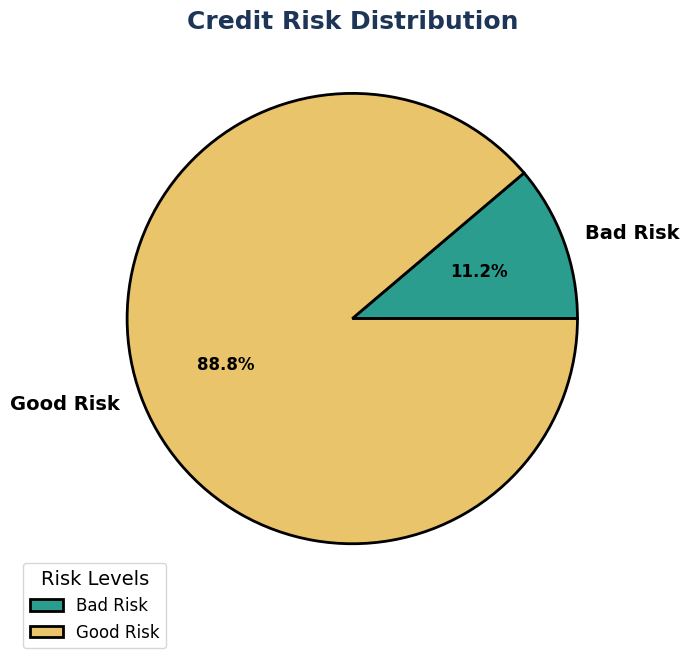

In [ ]:
# Define new labels and colors
labels = ['Bad Risk', 'Good Risk']
colors = ["#2a9d8f", "#e9c46a"]  # New color palette

# Set new palette
sns.set_palette(sns.color_palette(colors))

# Create a pie chart
fig, ax = plt.subplots(figsize=(7, 7))  # Slightly larger size
patches, texts, pcts = plt.pie(
    loan_risk['Total'],
    labels=labels,
    autopct='%.1f%%',  # Show 1 decimal place
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'black'},  # Black edge for wedges
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': '#333333'}  # Darker text color
)

# Style percentages
plt.setp(pcts, color='black', fontweight=700)  # Dark text for percentage values

# Style the labels
plt.setp(texts, fontweight=600, fontsize=14, color='#000000')  # Black color for labels

# Add a legend
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, -0.1), fontsize=12, title='Risk Levels', title_fontsize=14)

# Add title with a new style
ax.set_title('Credit Risk Distribution', fontsize=18, fontweight='bold', color='#1d3557')

# Adjust layout
plt.tight_layout()
plt.show()

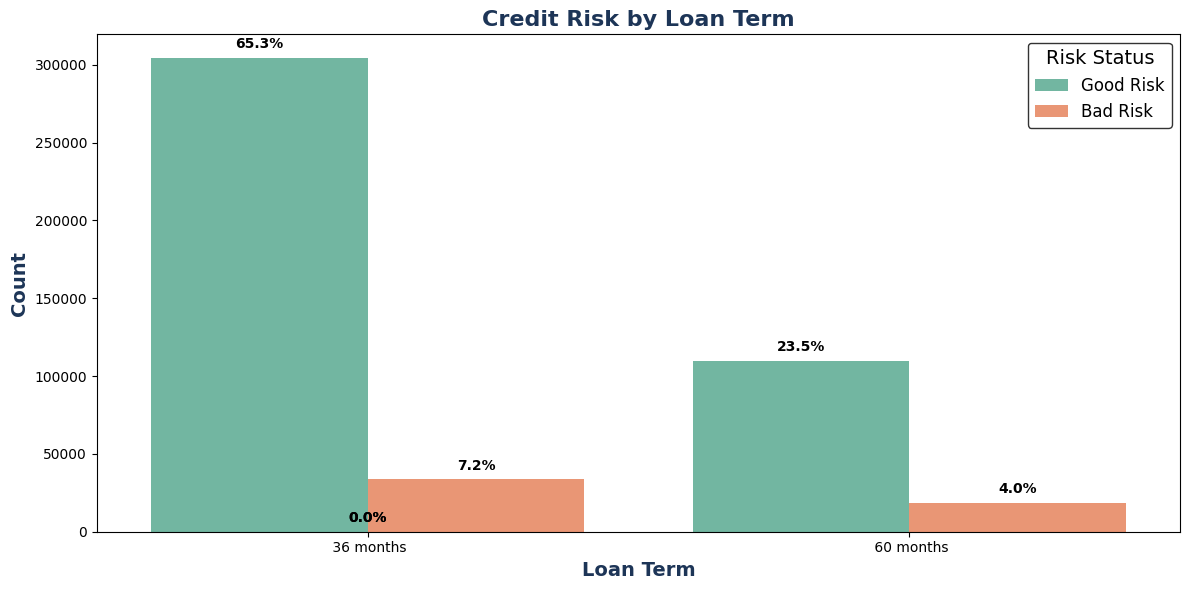

In [ ]:
# Create a bar plot with modified colors and layout
plt.figure(figsize=(12, 6))  # Slightly larger figure size
fig = sns.countplot(
    data=data_for_eda,
    x='term',
    hue='risk',
    palette='Set2'  # New color palette
)

# Update title and axis labels
plt.title('Credit Risk by Loan Term', fontsize=16, fontweight='bold', color='#1d3557')
plt.xlabel('Loan Term', fontsize=14, fontweight='bold', color='#1d3557')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#1d3557')

# Add percentages above bars
total = len(data_for_eda['term'])
for p in fig.patches:
    height = p.get_height()
    fig.annotate(
        f'{height / total:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 10),  # Adjusted text offset
        textcoords='offset points',
        fontsize=10, color='black', fontweight='bold'
    )

# Customize legend
plt.legend(
    title='Risk Status',
    loc='upper right',
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    edgecolor='black'
)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data_for_eda['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
def categorize_home_ownership(row):
    if row['home_ownership'] in {'MORTGAGE', 'RENT', 'OWN'}:
        return row['home_ownership']
    else:
        return 'OTHERS'

data_for_eda['home_ownership'] = data_for_eda.apply(categorize_home_ownership, axis=1)

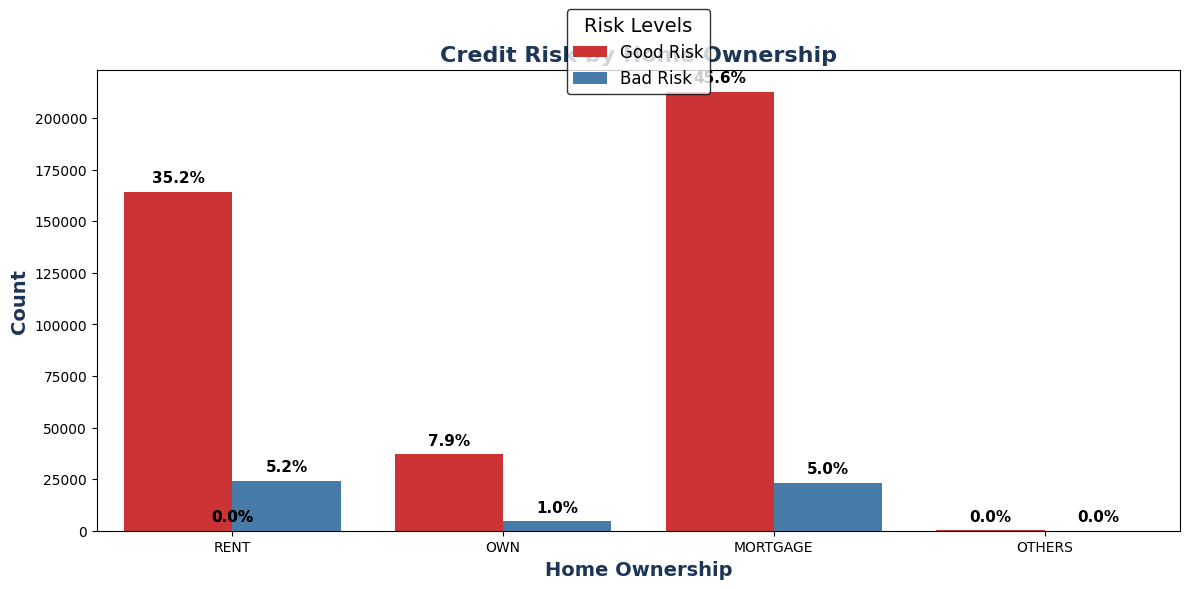

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(12, 6))  # Increased figure size
fig = sns.countplot(
    data=data_for_eda,
    x='home_ownership',
    hue='risk',
    palette='Set1'  # Changed palette to 'Set1' for bright, contrasting colors
)

# Update title and axis labels
plt.title('Credit Risk by Home Ownership', fontsize=16, fontweight='bold', color='#1d3557')
plt.xlabel('Home Ownership', fontsize=14, fontweight='bold', color='#1d3557')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#1d3557')

# Calculate total for percentages
total = len(data_for_eda['home_ownership'])

# Add percentages above bars
for p in fig.patches:
    height = p.get_height()
    fig.annotate(
        f'{height/total:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 10),  # Adjusted text offset
        textcoords='offset points',
        fontsize=11, color='black', fontweight='bold'
    )

# Customize legend
plt.legend(
    title='Risk Levels',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),  # Move legend above the plot
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    edgecolor='black'
)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
data_for_eda['purpose'].value_counts()

,count
purpose,
debt_consolidation,274195
credit_card,104157
home_improvement,26537
other,23690
major_purchase,9828
small_business,7013
car,5397
medical,4602
moving,2994


In [ ]:
# Categorize 'purpose' with updated conditions and categories
data_for_eda['purpose'] = np.select(
    condlist=[
        data_for_eda['purpose'] == 'debt_consolidation',
        data_for_eda['purpose'] == 'credit_card',
        data_for_eda['purpose'] == 'other',
        data_for_eda['purpose'] == 'major_purchase',
        data_for_eda['purpose'].str.contains('home|car|house', regex=True),
        data_for_eda['purpose'].str.contains('small|medic|moving|vaca|wedd|educa|renew', regex=True)
    ],
    choicelist=[
        'debt_consolidation',
        'credit_card',
        'other',
        'major_purchase',
        'Object_spending',
        'Life_spending'
    ]
)

# Filter and group data for 'Bad Risk' purposes
df_pr = (
    data_for_eda[data_for_eda['risk'] == 'Bad Risk']
    .groupby('purpose')['member_id']
    .count()
    .reset_index()
    .rename(columns={'purpose': 'Reason', 'member_id': 'Bad Risk'})
)

# Calculate percentage of 'Bad Risk'
df_pr['Perc'] = ((df_pr['Bad Risk'] / len(df_cleaned)) * 100).round(3)

# Sort by 'Bad Risk' count and reset index
df_pr = df_pr.sort_values(by='Bad Risk', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
df_pr


,Reason,Bad Risk,Perc
0,debt_consolidation,31836,6.828
1,credit_card,9200,1.973
2,Object_spending,3482,0.747
3,Life_spending,3367,0.722
4,other,3339,0.716
5,major_purchase,962,0.206


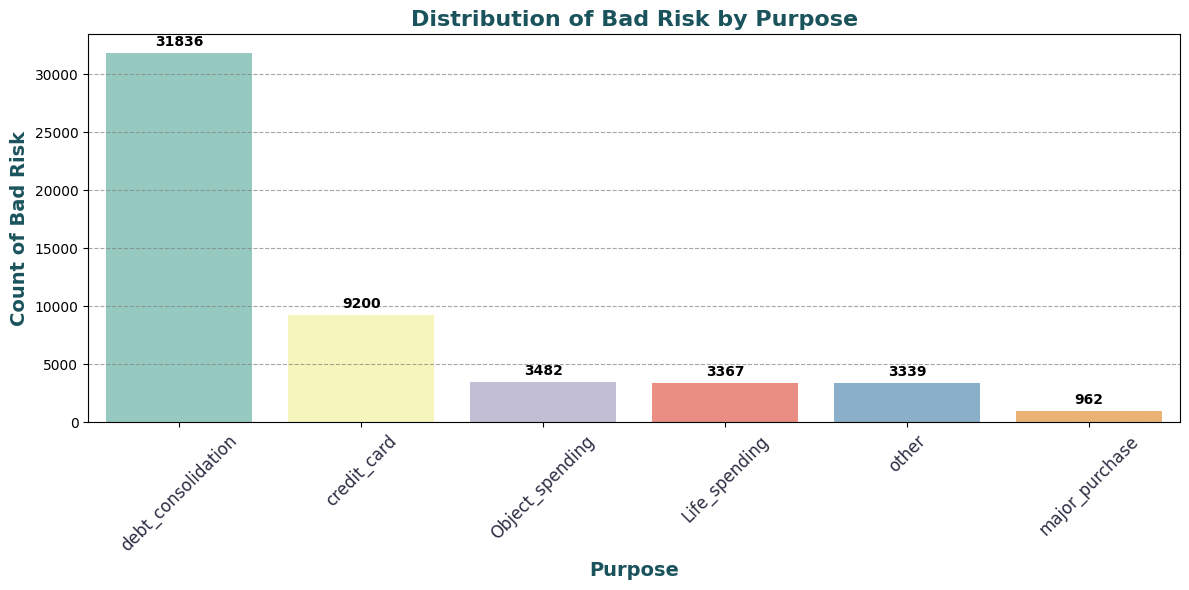

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
fig = sns.barplot(
    data=df_pr,
    x='Reason',
    y='Bad Risk',
    palette='Set3'  # Change to a bright and contrasting color palette
)

# Update title and axis labels with new styles
plt.title('Distribution of Bad Risk by Purpose', fontsize=16, fontweight='bold', color='#1a535c')
plt.xlabel('Purpose', fontsize=14, fontweight='bold', color='#1a535c')
plt.ylabel('Count of Bad Risk', fontsize=14, fontweight='bold', color='#1a535c')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, color='#2b2d42')

# Add gridlines for easier interpretation
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

# Add value annotations above the bars
for p in fig.patches:
    height = p.get_height()
    fig.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        xytext=(0, 8),  # Adjusted text offset
        textcoords='offset points',
        fontsize=10, color='black', fontweight='bold'
    )

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'next_pymnt_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal']

In [ ]:
df_sel = df_cleaned.copy()

In [ ]:
def calculate_woe(raw, feature_col):
    # Probability analysis
    woe_data = raw.groupby(feature_col).agg(
        num_observation=('loan_status', 'count'),
        good_loan_prob=('loan_status', 'mean')
    ).reset_index()

    # Calculate feature proportion
    woe_data['feature_proportion'] = woe_data['num_observation'] / woe_data['num_observation'].sum()

    # Calculate number of approved loans
    woe_data['num_loan_approve'] = woe_data['feature_proportion'] * woe_data['num_observation']

    # Calculate number of declined loans
    woe_data['num_loan_decline'] = (1 - woe_data['feature_proportion']) * woe_data['num_observation']

    # Calculate proportions
    woe_data['approved_proportion'] = woe_data['num_loan_approve'] / woe_data['num_loan_approve'].sum()
    woe_data['declined_proportion'] = woe_data['num_loan_decline'] / woe_data['num_loan_decline'].sum()

    # Calculate Weight of Evidence (WOE)
    woe_data['weight_of_evidence'] = np.log(woe_data['approved_proportion'] / woe_data['declined_proportion'])

    # Sort by WOE
    woe_data = woe_data.sort_values('weight_of_evidence').reset_index(drop=True)

    # Calculate Information Value (IV)
    woe_data['information_value'] = (
        (woe_data['approved_proportion'] - woe_data['declined_proportion'])
        * woe_data['weight_of_evidence']
    )
    woe_data['information_value'] = woe_data['information_value'].sum()

    # Drop unnecessary columns
    woe_data = woe_data.drop(
        ['feature_proportion', 'num_loan_approve', 'num_loan_decline', 'approved_proportion', 'declined_proportion'],
        axis=1
    )

    return woe_data

In [ ]:
df_cleaned.describe(include = 'O')

,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status
count,466285,466285,466285,466285,466285,466285
unique,7,11,6,3,14,2
top,B,10+ years,MORTGAGE,Verified,debt_consolidation,f
freq,136929,171057,235875,168055,274195,303005


In [ ]:
calculate_woe(df_sel,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.679711,-3.660567,0.292639
1,F,13229,0.741401,-2.257091,0.292639
2,E,35757,0.789775,-1.211753,0.292639
3,A,74867,0.959328,-0.377550,0.292639
4,D,76888,0.835787,-0.345737,0.292639
5,C,125293,0.878493,0.275309,0.292639
6,B,136929,0.917643,0.398836,0.292639


In [ ]:
calculate_woe(df_sel,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.881093,-1.682895,1.030304
1,8 years,22395,0.884349,-1.448086,1.030304
2,6 years,26112,0.876800,-1.286119,1.030304
3,7 years,26180,0.883613,-1.283364,1.030304
4,4 years,28023,0.882240,-1.211138,1.030304
5,1 year,29622,0.877017,-1.151991,1.030304
6,5 years,30774,0.878696,-1.111196,1.030304
7,< 1 year,36265,0.867944,-0.934325,1.030304
8,3 years,36596,0.882446,-0.924469,1.030304
9,2 years,41373,0.881251,-0.790600,1.030304


In [ ]:
df_sel['home_ownership'] = np.where(df_sel['home_ownership']=='ANY','OTHER',
                       np.where(df_sel['home_ownership']=='NONE','OTHER',df_sel['home_ownership']))


calculate_woe(df_sel,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,OTHER,233,0.669528,-7.308027,0.311741
1,OWN,41704,0.885359,-2.027519,0.311741
2,RENT,188473,0.866501,-0.095003,0.311741
3,MORTGAGE,235875,0.897594,0.316429,0.311741


In [ ]:
calculate_woe(df_sel,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.895262,-0.075220,0.007663
1,Source Verified,149993,0.891342,-0.057908,0.007663
2,Verified,168055,0.867008,0.114596,0.007663


In [ ]:
calculate_woe(df_sel,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.840456,-6.796087,1.409257
1,educational,422,0.637441,-6.611715,1.409257
2,house,2269,0.843543,-4.925653,1.409257
3,wedding,2343,0.860009,-4.893401,1.409257
4,vacation,2487,0.872135,-4.833445,1.409257
5,moving,2994,0.834335,-4.646819,1.409257
6,medical,4602,0.856584,-4.213461,1.409257
7,car,5397,0.900130,-4.052385,1.409257
8,small_business,7013,0.766862,-3.786951,1.409257
9,major_purchase,9828,0.891941,-3.443333,1.409257


In [ ]:
calculate_woe(df_sel,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,163280,0.907741,-0.798355,0.340013
1,f,303005,0.870926,0.438211,0.340013


In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
term,466285.0,42.605334,10.719040,36.00,36.00,36.00,60.00,60.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.00,63000.00,88953.00,7500000.00
loan_status,466285.0,0.883818,0.320444,0.00,1.00,1.00,1.00,1.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.00,0.00,0.00,29.00
earliest_cr_line,466285.0,218.480348,93.972277,-633.00,162.00,204.00,264.00,566.00
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.00,0.00,1.00,33.00
open_acc,466285.0,11.186995,4.987380,0.00,8.00,10.00,14.00,84.00


In [ ]:
df_sel['loan_amnt_fs'] = pd.cut(df_sel['loan_amnt'], 5)
calculate_woe(df_sel,'loan_amnt_fs')

,loan_amnt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 35000.0]",34906,0.875867,-1.391294,0.249414
1,"(21200.0, 28100.0]",52172,0.882504,-0.948559,0.249414
2,"(465.5, 7400.0]",103603,0.884096,-0.129926,0.249414
3,"(14300.0, 21200.0]",118918,0.883458,0.051086,0.249414
4,"(7400.0, 14300.0]",156686,0.886116,0.442000,0.249414


In [ ]:
calculate_woe(df_sel,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60,128332,0.853458,-1.378129,0.72423
1,36,337953,0.895346,0.558444,0.72423


In [ ]:
df_sel['int_rate_fs'] = pd.cut(df_sel['int_rate'], 5)
calculate_woe(df_sel,'int_rate_fs')

,int_rate_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(21.932, 26.06]",23189,0.761870,-1.899708,0.284226
1,"(17.804, 21.932]",57785,0.809241,-0.905362,0.284226
2,"(5.399, 9.548]",83978,0.959859,-0.465268,0.284226
3,"(13.676, 17.804]",147973,0.860704,0.284398,0.284226
4,"(9.548, 13.676]",153360,0.911020,0.337225,0.284226


In [ ]:
df_sel['annual_inc_fs'] = pd.cut(df_sel['annual_inc'], 5)
calculate_woe(df_sel,'annual_inc_fs')

,annual_inc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(3001137.6, 4500758.4]",1,1.000000,-22.467463,10.68265
1,"(4500758.4, 6000379.2]",4,1.000000,-21.081162,10.68265
2,"(6000379.2, 7500000.0]",4,1.000000,-21.081162,10.68265
3,"(1501516.8, 3001137.6]",10,1.000000,-20.164858,10.68265
4,"(-5602.104, 1501516.8]",466266,0.883813,0.693160,10.68265


In [ ]:
df_sel['dti_fs'] = pd.cut(df_sel['dti'], 5)
calculate_woe(df_sel,'dti_fs')

,dti_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(31.992, 39.99]",16407,0.864814,-2.306884,0.293918
1,"(-0.04, 7.998]",59690,0.901642,-0.914269,0.293918
2,"(23.994, 31.992]",80361,0.863827,-0.564727,0.293918
3,"(7.998, 15.996]",154680,0.897110,0.304006,0.293918
4,"(15.996, 23.994]",155147,0.876072,0.308521,0.293918


In [ ]:
df_sel['delinq_2yrs_fs'] = np.where(df_sel['delinq_2yrs'] > 3, 3,
                                 np.where(df_sel['delinq_2yrs'] == 2, 2,
                                 np.where(df_sel['delinq_2yrs'] == 1,1,0)))
calculate_woe(df_sel,'delinq_2yrs_fs')

,delinq_2yrs_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,5084,0.881786,-5.406375,2.038543
1,2,16310,0.880135,-4.216053,2.038543
2,1,56224,0.885654,-2.885602,2.038543
3,0,388667,0.883733,0.712284,2.038543


In [ ]:
df_sel['earliest_cr_line_fs'] = pd.cut(df_sel['earliest_cr_line'], 5)
calculate_woe(df_sel,'earliest_cr_line_fs')

,earliest_cr_line_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(-393.2, -153.4]",4,1.000000,-12.828953,2.085151
1,"(-634.199, -393.2]",1165,0.864378,-7.152278,2.085151
2,"(-153.4, 86.4]",7464,0.871651,-5.281272,2.085151
3,"(326.2, 566.0]",54388,0.903766,-3.187333,2.085151
4,"(86.4, 326.2]",403264,0.881408,0.693420,2.085151


In [ ]:
df_sel['inq_last_6mths_fs'] = np.where(df_sel['inq_last_6mths'] == 0,0,
                                    np.where((df_sel['inq_last_6mths'] > 0)&(df_sel['inq_last_6mths'] <=3),1,
                                    np.where((df_sel['inq_last_6mths']>3)&(df_sel['inq_last_6mths']<=6),2,
                                    np.where((df_sel['inq_last_6mths']>6)&(df_sel['inq_last_6mths']<=9),3,4))))

# show
calculate_woe(df_sel,'inq_last_6mths_fs')

,inq_last_6mths_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4,95,0.000000,-8.409390,0.188408
1,3,367,0.147139,-7.057322,0.188408
2,2,11197,0.737162,-3.615764,0.188408
3,1,213099,0.869033,-0.083286,0.188408
4,0,241527,0.905129,0.161038,0.188408


In [ ]:
df_sel['open_acc_fs'] = pd.cut(df_sel['open_acc'], 5)
calculate_woe(df_sel,'open_acc_fs')

,open_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 84.0]",4,0.500000,-12.858748,1.830395
1,"(50.4, 67.2]",22,1.000000,-11.153962,1.830395
2,"(33.6, 50.4]",898,0.886414,-7.442954,1.830395
3,"(16.8, 33.6]",61622,0.886907,-3.074535,1.830395
4,"(-0.084, 16.8]",403739,0.883338,0.672367,1.830395


In [ ]:
df_sel['pub_rec_fs'] = pd.cut(df_sel['pub_rec'], 5)
calculate_woe(df_sel,'pub_rec_fs')

,pub_rec_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(25.2, 37.8]",1,1.000000,-22.703865,10.838649
1,"(37.8, 50.4]",2,1.000000,-22.010715,10.838649
2,"(50.4, 63.0]",2,1.000000,-22.010715,10.838649
3,"(12.6, 25.2]",10,1.000000,-20.401260,10.838649
4,"(-0.063, 12.6]",466270,0.883814,0.693155,10.838649


In [ ]:
df_sel['revol_bal_fs'] = np.where((df_sel['revol_bal']>=0)&(df_sel['revol_bal']<=5000),0,
                               np.where((df_sel['revol_bal']>5000)&(df_sel['revol_bal']<=10000),1,
                               np.where((df_sel['revol_bal']>10000)&(df_sel['revol_bal']<=15000),2,3)))

# show
woe(df_sel,'revol_bal_fs')

,revol_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.875239,-0.576520,0.197731
1,2,88805,0.882011,-0.487635,0.197731
2,1,115537,0.880480,-0.151038,0.197731
3,3,179353,0.890813,0.489550,0.197731


In [ ]:
df_sel['revol_util_fs'] = np.where((df_sel['revol_util']>=0)&(df_sel['revol_util']<=20),0,
                                np.where((df_sel['revol_util']>20)&(df_sel['revol_util']<=40),1,
                                np.where((df_sel['revol_util']>40)&(df_sel['revol_util']<=60),2,
                                np.where((df_sel['revol_util']>60)&(df_sel['revol_util']<=80),3,4))))

# show
calculate_woe(df_sel,'revol_util_fs')

,revol_util_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37402,0.907438,-1.220141,0.157668
1,1,83492,0.901679,-0.303424,0.157668
2,4,84062,0.859449,-0.295130,0.157668
3,2,129737,0.889114,0.266088,0.157668
4,3,131592,0.876117,0.285812,0.157668


In [ ]:
df_sel['total_acc_fs'] = pd.cut(df_sel['total_acc'], 5)
calculate_woe(df_sel,'total_acc_fs')

,total_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(125.0, 156.0]",2,1.000000,-12.936344,1.03453
1,"(94.0, 125.0]",28,0.964286,-10.297231,1.03453
2,"(63.0, 94.0]",1221,0.904177,-6.519448,1.03453
3,"(32.0, 63.0]",107819,0.891911,-1.778323,1.03453
4,"(0.845, 32.0]",357215,0.881298,0.609405,1.03453


In [ ]:
df_sel['out_prncp_fs'] = np.where((df_sel['out_prncp']>=0)&(df_sel['out_prncp']<=1000),0,
                               np.where((df_sel['out_prncp']>1000)&(df_sel['out_prncp']<=10000),1,
                               np.where((df_sel['out_prncp']>10000)&(df_sel['out_prncp']<=17000),2,3)))

# show
calculate_woe(df_sel,'out_prncp_fs')

,out_prncp_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,28933,0.948225,-2.216759,0.587279
1,2,53928,0.956887,-1.535243,0.587279
2,1,142293,0.965585,-0.323834,0.587279
3,0,241131,0.811497,0.567552,0.587279


In [ ]:
df_sel['total_rec_late_fee_fs'] = np.where(df_sel['total_rec_late_fee']==0,0,1)

# show
calculate_woe(df_sel,'total_rec_late_fee_fs')

,total_rec_late_fee_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,1,10678,0.507024,-6.814292,3.749324
1,0,455607,0.892649,0.692598,3.749324


In [ ]:
df_sel['recoveries_fs'] = pd.cut(df_sel['recoveries'], 5)
calculate_woe(df_sel,'recoveries_fs')

,recoveries_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(26816.216, 33520.27]",5,0.000000,-17.866686,7.407134
1,"(20112.162, 26816.216]",13,0.000000,-16.911158,7.407134
2,"(13408.108, 20112.162]",45,0.000000,-15.669376,7.407134
3,"(6704.054, 13408.108]",315,0.000000,-13.722887,7.407134
4,"(-33.52, 6704.054]",465907,0.884535,0.693264,7.407134


In [ ]:
df_sel['last_pymnt_d_fs'] = np.where(df_sel['last_pymnt_d']==2,0,
                                  np.where((df_sel['last_pymnt_d']>2)&(df_sel['last_pymnt_d']<=4),1,
                                  np.where((df_sel['last_pymnt_d']>4)&(df_sel['last_pymnt_d']<=6),2,
                                  np.where((df_sel['last_pymnt_d']>6)&(df_sel['last_pymnt_d']<=12),3,4))))

# show
calculate_woe(df_sel,'last_pymnt_d_fs')

,last_pymnt_d_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,2,21452,0.793259,-2.047872,0.374923
1,3,61476,0.790487,-0.900759,0.374923
2,1,71317,0.945413,-0.727661,0.374923
3,4,132044,0.759845,0.055282,0.374923
4,0,179996,0.993028,0.519942,0.374923


In [ ]:
df_sel['collections_12_mths_ex_med_fs'] = pd.cut(df_sel['collections_12_mths_ex_med'], 5)
calculate_woe(df_sel,'collections_12_mths_ex_med_fs')

,collections_12_mths_ex_med_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(12.0, 16.0]",1,1.000000,-24.02565,12.186145
1,"(16.0, 20.0]",1,1.000000,-24.02565,12.186145
2,"(4.0, 8.0]",2,1.000000,-23.33250,12.186145
3,"(-0.02, 4.0]",466281,0.883817,0.69315,12.186145
4,"(8.0, 12.0]",0,NaN,NaN,12.186145


In [ ]:
df_sel['acc_now_delinq_fs'] = pd.cut(df_sel['acc_now_delinq'], 5)
calculate_woe(df_sel,'acc_now_delinq_fs')

,acc_now_delinq_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(4.0, 5.0]",2,0.500000,-20.027192,8.645917
1,"(3.0, 4.0]",4,1.000000,-19.334041,8.645917
2,"(2.0, 3.0]",11,0.818182,-18.322425,8.645917
3,"(1.0, 2.0]",92,0.902174,-16.198358,8.645917
4,"(-0.005, 1.0]",466176,0.883816,0.693179,8.645917


In [ ]:
df_sel['tot_coll_amt_fs'] = pd.cut(df_sel['tot_coll_amt'], 5)
calculate_woe(df_sel,'tot_coll_amt_fs')

,tot_coll_amt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(7322036.0, 9152545.0]",1,1.000000,-25.411953,13.05255
1,"(-9152.545, 1830509.0]",466284,0.883818,0.693147,13.05255
2,"(1830509.0, 3661018.0]",0,NaN,NaN,13.05255
3,"(3661018.0, 5491527.0]",0,NaN,NaN,13.05255
4,"(5491527.0, 7322036.0]",0,NaN,NaN,13.05255


In [ ]:
df_sel['tot_cur_bal_fs'] = pd.cut(df_sel['tot_cur_bal'], 5)
calculate_woe(df_sel,'tot_cur_bal_fs')

,tot_cur_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(6400062.4, 8000078.0]",1,1.000000,-20.624183,8.44193
1,"(3200031.2, 4800046.8]",11,0.909091,-18.226266,8.44193
2,"(1600015.6, 3200031.2]",108,0.935185,-15.941822,8.44193
3,"(-8000.078, 1600015.6]",466165,0.883805,0.693170,8.44193
4,"(4800046.8, 6400062.4]",0,NaN,NaN,8.44193


In [ ]:
drop_list = ['emp_length','verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs','earliest_cr_line', 'total_acc','open_acc', 'pub_rec',
             'out_prncp', 'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med',
             'acc_now_delinq','tot_coll_amt','tot_cur_bal']

print(len(drop_list))

17


In [ ]:
# Create a copy of df_clean for encoding
df_encode = df_cleaned.loc[:, :].copy()

In [ ]:
df_encode.drop(['emp_length','verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs','earliest_cr_line', 'total_acc','open_acc', 'pub_rec',
             'out_prncp', 'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med',
             'acc_now_delinq','tot_coll_amt','tot_cur_bal'], axis = 1, inplace=True)

In [ ]:
# Separate numeric and categorical columns
numeric_columns = df_encode.select_dtypes(include='number').columns
categorical_columns = df_encode.select_dtypes(exclude='number').columns

In [ ]:
# Encode categorical columns with one-hot encoding
categorical_features = ['grade', 'home_ownership', 'initial_list_status']

for feature in categorical_features:
    one_hot_encoded = pd.get_dummies(df_cleaned[feature], prefix=feature)
    df_encode = pd.concat([df_encode, one_hot_encoded], axis=1)

# Drop the original categorical columns
df_encode.drop(columns=categorical_features, inplace=True)

# Display the updated DataFrame
df_encode.head()

,loan_amnt,int_rate,loan_status,dti,inq_last_6mths,revol_bal,revol_util,last_pymnt_d,next_pymnt_d,grade_A,...,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w
0,5000,10.65,1,27.65,1.0,13648,83.7,14.0,NaN,False,...,False,False,False,False,False,False,False,True,True,False
1,2500,15.27,0,1.00,5.0,1687,9.4,35.0,NaN,False,...,False,False,False,False,False,False,False,True,True,False
2,2400,15.96,1,8.72,2.0,2956,98.5,21.0,NaN,False,...,False,False,False,False,False,False,False,True,True,False
3,10000,13.49,1,20.00,1.0,5598,21.0,14.0,NaN,False,...,False,False,False,False,False,False,False,True,True,False
4,3000,12.69,1,17.94,0.0,27783,53.9,2.0,NaN,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'loan_amnt', 'int_rate', 'loan_status', 'dti', 'inq_last_6mths',
    'revol_bal', 'revol_util', 'last_pymnt_d'
]

# Apply Label Encoding
for column in columns_to_encode:
    df_encode[column] = label_encoder.fit_transform(df_cleaned[column])


In [ ]:
print("Total Rows :", df_encode.shape[0])
print("Total Features :", df_encode.shape[1])

Total Rows : 466285
Total Features : 24


In [ ]:
df_model = df_encode.copy()

In [ ]:
# Separate features and target variable
X = df_model.drop(columns=['loan_status'], axis=1)
y = df_model['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    fig, ax = plt.subplots(figsize=(5, 5))  # Slightly larger plot size
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12}, ax=ax
    )

    # Set title and labels
    ax.set_title(f'Confusion Matrix: {title}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'], fontsize=10)
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'], fontsize=10)

    plt.tight_layout()
    plt.show()

# Function to evaluate the classification model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_proba_test = model.predict_proba(X_test)
    y_proba_train = model.predict_proba(X_train)

    # Print evaluation metrics
    print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred_test):.2f}")
    print(f"Precision (Test Set): {precision_score(y_test, y_pred_test):.2f}")
    print(f"Recall (Test Set): {recall_score(y_test, y_pred_test):.2f}")
    print(f"F1-Score (Test Set): {f1_score(y_test, y_pred_test):.2f}")
    print(f"ROC AUC (Test Proba): {roc_auc_score(y_test, y_proba_test[:, 1]):.2f}")
    print(f"ROC AUC (Train Proba): {roc_auc_score(y_train, y_proba_train[:, 1]):.2f}")


Logistic Regression

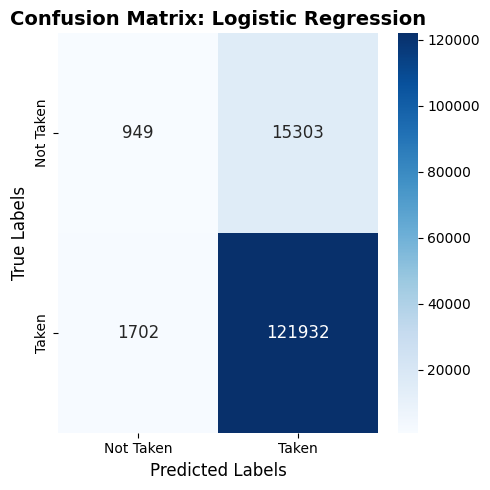

Accuracy (Test Set): 0.88
Precision (Test Set): 0.89
Recall (Test Set): 0.99
F1-Score (Test Set): 0.93
ROC AUC (Test Proba): 0.73
ROC AUC (Train Proba): 0.72


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit and evaluate the model
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

plot_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
evaluate_model(model_LR, X_train, y_train, X_test, y_test)


Decision Tree

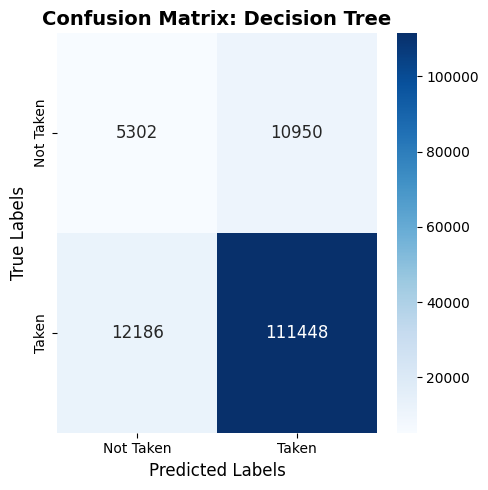

Accuracy (Test Set): 0.83
Precision (Test Set): 0.91
Recall (Test Set): 0.90
F1-Score (Test Set): 0.91
ROC AUC (Test Proba): 0.61
ROC AUC (Train Proba): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

plot_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
evaluate_model(model_DT, X_train, y_train, X_test, y_test)
model_DT.get_params

Random Forest

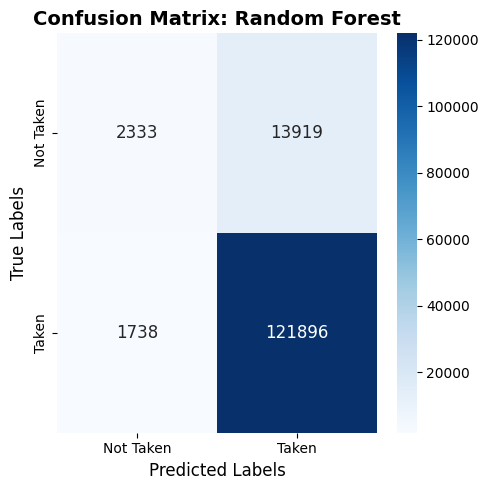

Accuracy (Test Set): 0.89
Precision (Test Set): 0.90
Recall (Test Set): 0.99
F1-Score (Test Set): 0.94
ROC AUC (Test Proba): 0.85
ROC AUC (Train Proba): 1.00


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [354]:
model_RF =  RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

plot_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
evaluate_model(model_RF, X_train, y_train, X_test, y_test)
model_RF.get_params()